In [1]:
# все необходимые пакеты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker 
%matplotlib inline


# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [2]:
url ='https://raw.githubusercontent.com/Yorko/mlcourse_open/master/data/mlbootcamp5_train.csv'
train = pd.read_csv(url, sep=';', index_col='id')

In [3]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


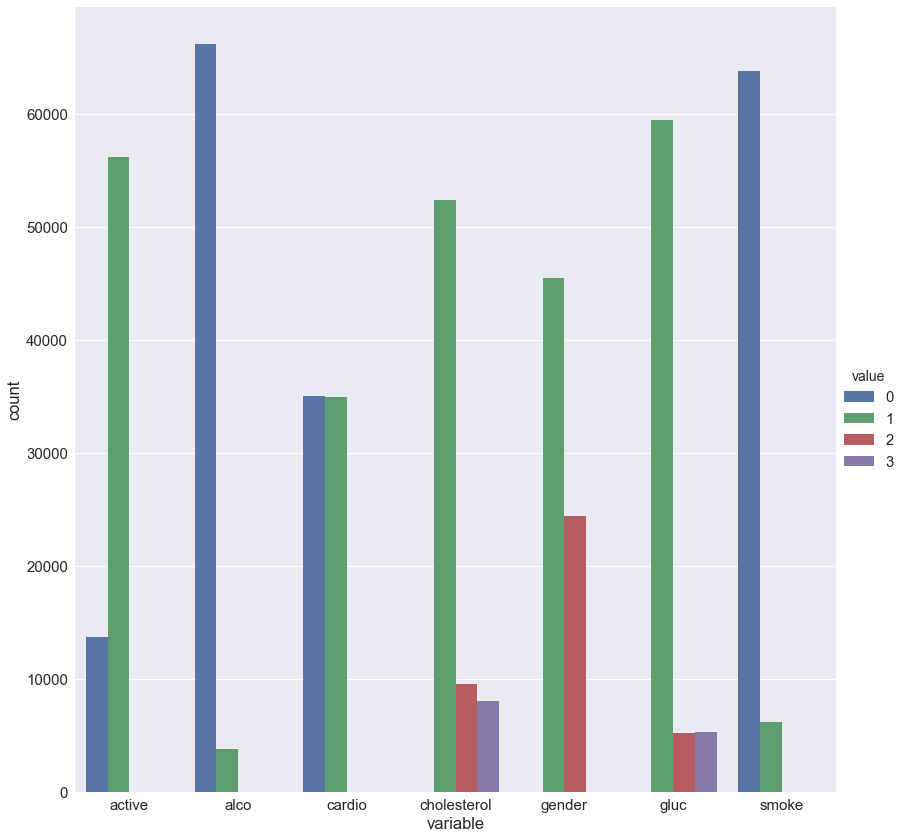

In [4]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

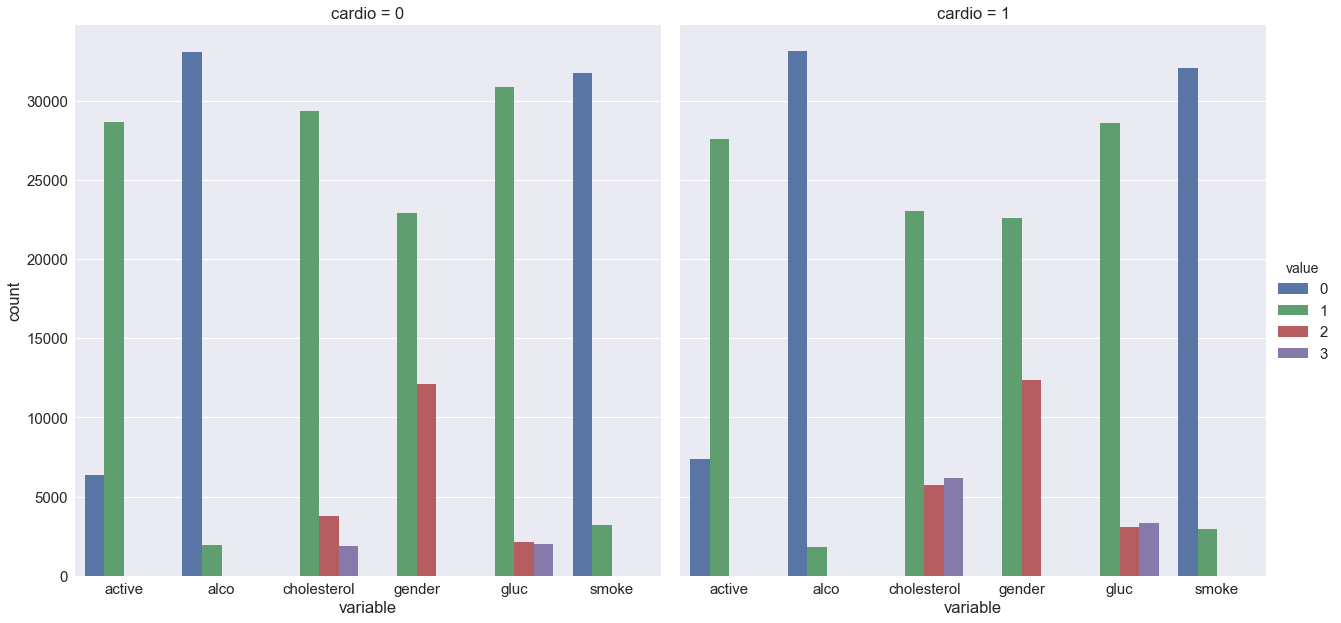

In [5]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=train_uniques, kind='bar', size=9);

In [6]:
for c in train.columns:
    n = train[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [39]:
# Вопрос 1. Какие два признака больше всего коррелируют (по Пирсону) с признаком gender ?
# Ответ : Height, Smoke

In [32]:
# анализируемые в вопросе столбцы
cols = ['gender', 'cardio', 'cholesterol', 'height', 'weight', 'alco', 'smoke']

In [35]:
# можно просто посмотреть на коэффициенты корреляции
train.corrwith(train['gender'])

age           -0.022811
gender         1.000000
height         0.499033
weight         0.155406
ap_hi          0.006005
ap_lo          0.015254
cholesterol   -0.035821
gluc          -0.020491
smoke          0.338135
alco           0.170966
active         0.005866
cardio         0.008109
dtype: float64

In [37]:
# можно построить матрицу корреляции "всех со всеми"
corr_matrix_p = train[cols].corr()
print(corr_matrix_p)

               gender    cardio  cholesterol    height    weight      alco  \
gender       1.000000  0.008109    -0.035821  0.499033  0.155406  0.170966   
cardio       0.008109  1.000000     0.221147 -0.010821  0.181660 -0.007330   
cholesterol -0.035821  0.221147     1.000000 -0.050226  0.141768  0.035760   
height       0.499033 -0.010821    -0.050226  1.000000  0.290968  0.094419   
weight       0.155406  0.181660     0.141768  0.290968  1.000000  0.067113   
alco         0.170966 -0.007330     0.035760  0.094419  0.067113  1.000000   
smoke        0.338135 -0.015486     0.010354  0.187989  0.067780  0.340094   

                smoke  
gender       0.338135  
cardio      -0.015486  
cholesterol  0.010354  
height       0.187989  
weight       0.067780  
alco         0.340094  
smoke        1.000000  


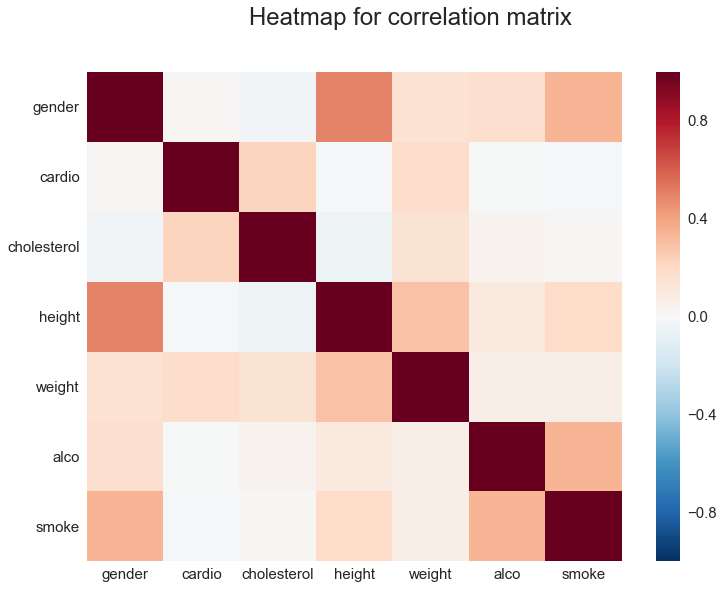

In [73]:
# и нарисовать heatmap
corr_heatmap = sns.heatmap(corr_matrix_p)
corr_heatmap.figure.suptitle("Heatmap for correlation matrix", fontsize = 24)

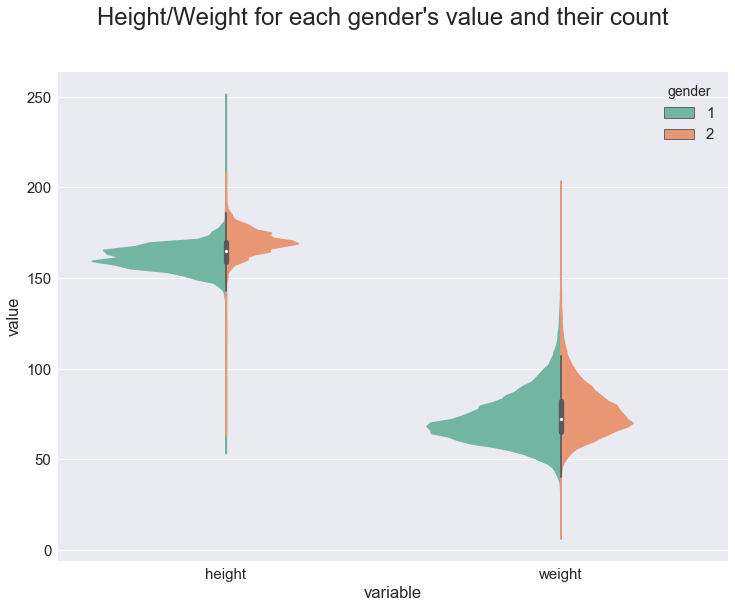

In [77]:
df = pd.melt(train, value_vars=['height', 'weight'], id_vars='gender')
gender_vplot = sns.violinplot(x='variable', y='value', hue='gender', data=df, scale="count", palette="Set2", split=True)
gender_vplot.figure.suptitle("Height/Weight for each gender's value and their count", fontsize = 24)
plt.show()

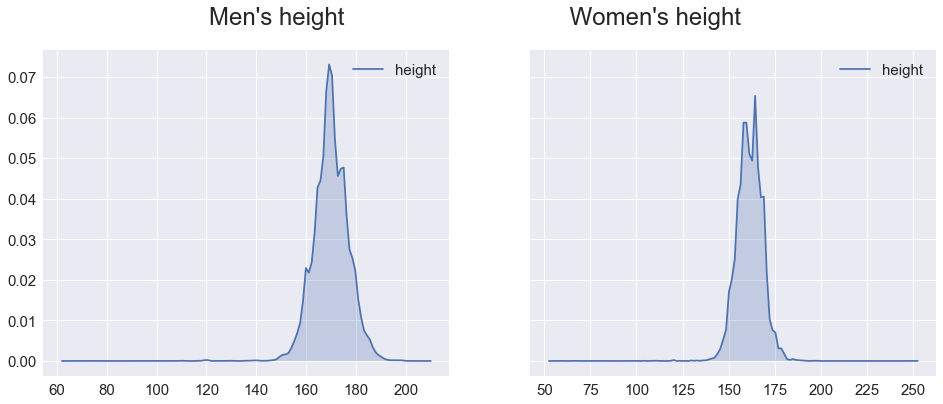

In [114]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
men = train.loc[train.gender == 2]
women = train.loc[train.gender == 1]

men_kdeplot = sns.kdeplot(men.height,ax = axes[0], shade=True)

women_kdeplot = sns.kdeplot(women.height,ax = axes[1], shade=True)
women_kdeplot.figure.suptitle("Men's height                                  Women's height", fontsize = 24)

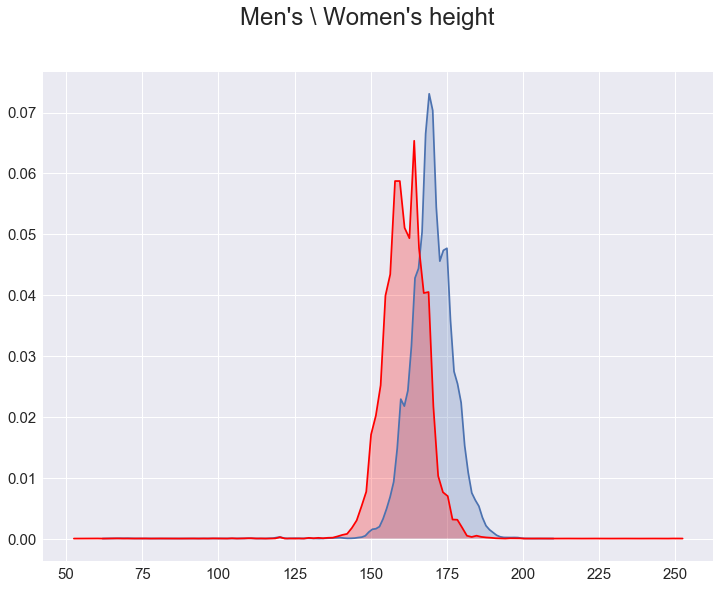

In [121]:
ax = sns.kdeplot(men.height,shade=True, legend = False)
ax = sns.kdeplot(women.height,shade=True, color="r", legend = False)
ax.figure.suptitle("Men's \ Women's height", fontsize = 24)

In [ ]:
# Вопрос 3.1 Какие признаки теперь больше всего коррелируют (по Спирмену) друг с другом? 
# Ответ: ap_hi, ap_lo

In [125]:
corr_matrix_sp= train.corr(method ='spearman')
print(corr_matrix_sp)

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.020176 -0.082292  0.061559  0.219087  0.156700   
gender      -0.020176  1.000000  0.533805  0.172480  0.063174  0.066374   
height      -0.082292  0.533805  1.000000  0.313569  0.019381  0.030534   
weight       0.061559  0.172480  0.313569  1.000000  0.277749  0.254420   
ap_hi        0.219087  0.063174  0.019381  0.277749  1.000000  0.735436   
ap_lo        0.156700  0.066374  0.030534  0.254420  0.735436  1.000000   
cholesterol  0.140113 -0.035730 -0.058940  0.137908  0.208722  0.167401   
gluc         0.091791 -0.018866 -0.024369  0.109901  0.105334  0.082474   
smoke       -0.047471  0.338135  0.197632  0.071676  0.028929  0.026172   
alco        -0.030078  0.170966  0.096670  0.068088  0.033243  0.038862   
active      -0.010422  0.005866 -0.007367 -0.014894 -0.001268  0.003401   
cardio       0.234429  0.008109 -0.012383  0.182701  0.451885  0.362572   

             cholesterol

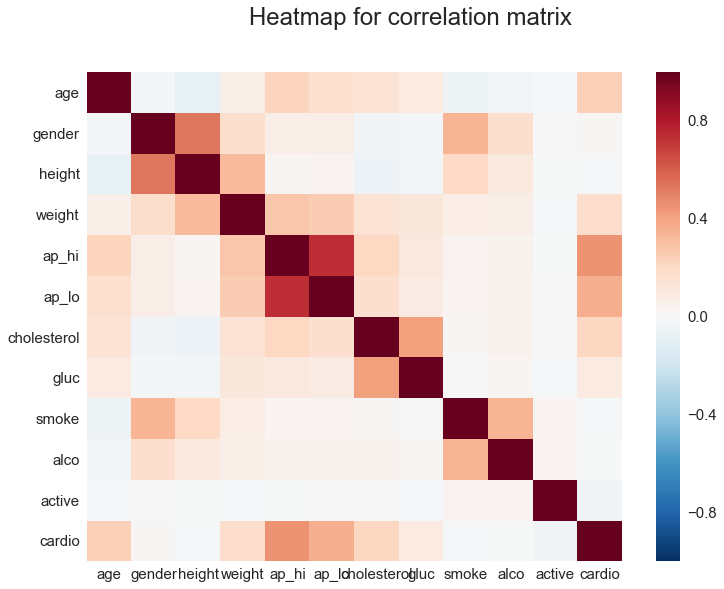

In [126]:
# и нарисовать heatmap
corr_heatmap_sp = sns.heatmap(corr_matrix_sp)
corr_heatmap_sp.figure.suptitle("Heatmap for correlation matrix", fontsize = 24)

In [ ]:
# Вопрос 3.2. Почему мы получили такое большое (относительно) значение ранговой корреляции у этих признаков?
# Ответ: Всегда нижнее давление меньше верхнего, это "природа данных"

In [ ]:
# Вопрос 4 Постройте совместный график распределения jointplot двух наиболее коррелирующих между собой признаков (по Спирмену). 

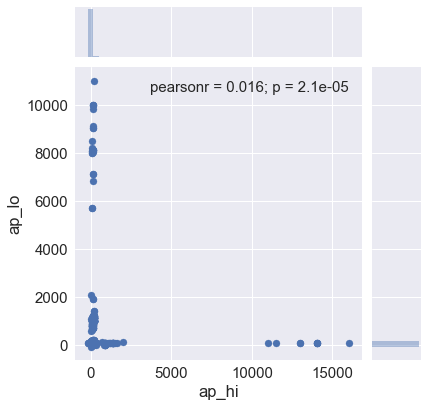

In [201]:
g1 = sns.jointplot('ap_hi', 'ap_lo', data = train)

In [ ]:
# Постройте тот же график, но с логарифмической шкалой.

In [ ]:
# Вопрос 4.1 Сколько четко выраженных кластеров получилось на совместном графике выбранных признаков, с логарифмической шкалой?
# Ответ: больше 3

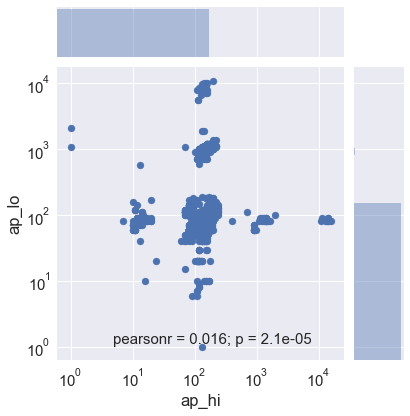

In [202]:
glog = sns.jointplot('ap_hi', 'ap_lo', data = train)
glog.ax_joint.grid(True) 
glog.ax_joint.set_xscale('log')
glog.ax_joint.set_yscale('log')

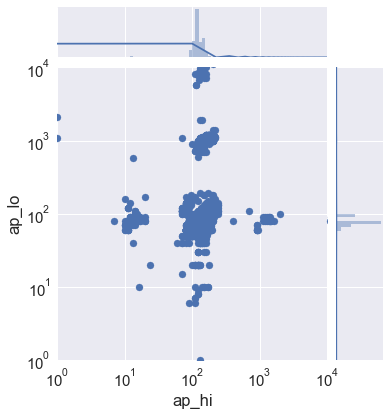

In [205]:
# непонятная хрень со стековерфлоу
mybins=np.logspace(0,np.log(100),100)

glog2 = sns.JointGrid('ap_hi', 'ap_lo', train,xlim=[1,10000],ylim=[1,10000])
glog2.plot_marginals(sns.distplot, hist=True, kde=True, bins=mybins)
glog2.plot_joint(plt.scatter)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
glog2.ax_marg_x.set_xscale('log')
glog2.ax_marg_y.set_yscale('log')

In [169]:
# Вопрос 5 В каком возрасте количество пациентов с ССЗ впервые становится больше, чем здоровых?
# Ответ: 53

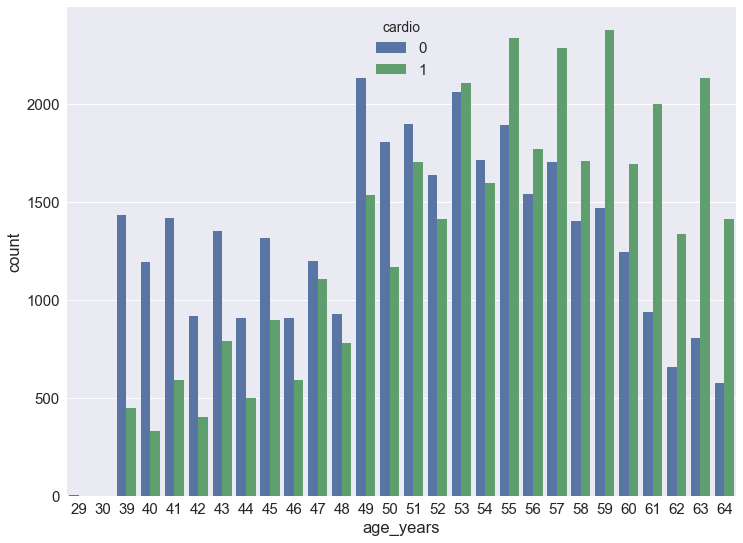

In [170]:
train['age_years'] = (train['age'] // 365.25).astype(int)
ageplot = sns.countplot(x = 'age_years', hue = 'cardio', data = train) 